In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('Coustomer Segmentation.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [7]:
df=df.dropna()
df.isnull().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
df.describe()

# we can see that quantuity has negative values

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
for i in df.columns:
    print(i , '=' , len(df[i].unique()))

InvoiceNo = 22190
StockCode = 3684
Description = 3896
Quantity = 436
InvoiceDate = 20460
UnitPrice = 620
CustomerID = 4372
Country = 37


In [10]:
df=df.drop(df[df['Quantity']<0].index)

In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [12]:
# adding a column named amount spent
df['AmountSpent']=df['Quantity']*df['UnitPrice']

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [14]:
df['InvDay']=df['InvoiceDate'].dt.date
df['InvTime']=df['InvoiceDate'].dt.time
df['month']=df['InvoiceDate'].dt.month_name()
df['day']=df['InvoiceDate'].dt.day_name()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,InvDay,InvTime,month,day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00,December,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,December,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00,December,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,December,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,December,Wednesday


# EDA

In [15]:
# Top 5 Customers with the highest no of orders

tf=df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()
tf.sort_values(by='InvoiceNo', ascending=False).iloc[:5]

,CustomerID,Country,InvoiceNo
4019,17841.0,United Kingdom,7847
1888,14911.0,EIRE,5677
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4596
1670,14606.0,United Kingdom,2700


In [16]:
# Highest money spent by customers
hm=df[['CustomerID','Country','AmountSpent']]
hm.sort_values(by='AmountSpent', ascending=False).iloc[:5]

,CustomerID,Country,AmountSpent
540421,16446.0,United Kingdom,168469.60
61619,12346.0,United Kingdom,77183.60
222680,15098.0,United Kingdom,38970.00
173382,16029.0,United Kingdom,8142.75
348325,17450.0,United Kingdom,7144.72


In [17]:
# TOP 10 STOCKCODES BY QUANTITY
df4=df.groupby('StockCode').sum()
df4.sort_values(['Quantity'], ascending=False,inplace=True)
df4.reset_index(inplace=True)
df5=df4[['StockCode','Quantity']][:10]
df5

,StockCode,Quantity
0,23843,80995
1,23166,77916
2,84077,54415
3,22197,49183
4,85099B,46181
5,85123A,36782
6,84879,35362
7,21212,33693
8,23084,27202
9,22492,26076


Text(0.5, 1.0, 'Top 10 StockCodes by quantity')

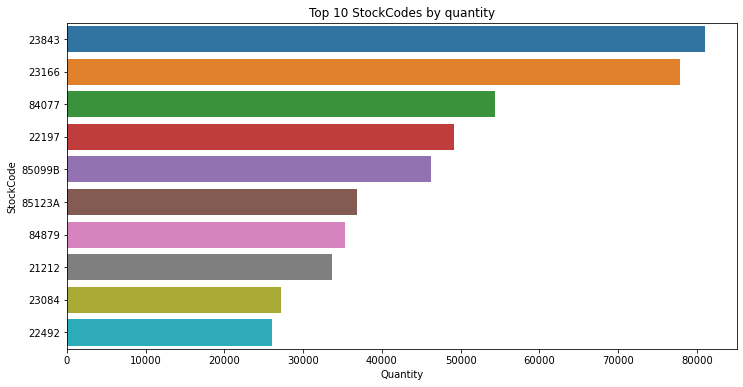

In [18]:
# top 10 StockCodes by quantity
plt.figure(figsize=(12,6))
sns.barplot(x=df5['Quantity'],y=df5['StockCode'])
plt.title('Top 10 StockCodes by quantity')

In [19]:
TopCountries=df.groupby('Country')['AmountSpent'].sum().reset_index().sort_values('AmountSpent',ascending=False)
TopCountries

,Country,AmountSpent
35,United Kingdom,7308391.554
23,Netherlands,285446.340
10,EIRE,265545.900
14,Germany,228867.140
13,France,209024.050
0,Australia,138521.310
30,Spain,61577.110
32,Switzerland,56443.950
3,Belgium,41196.340
31,Sweden,38378.330


Text(0.5, 1.0, 'Top 5 Countries based on highest Amount Spent')

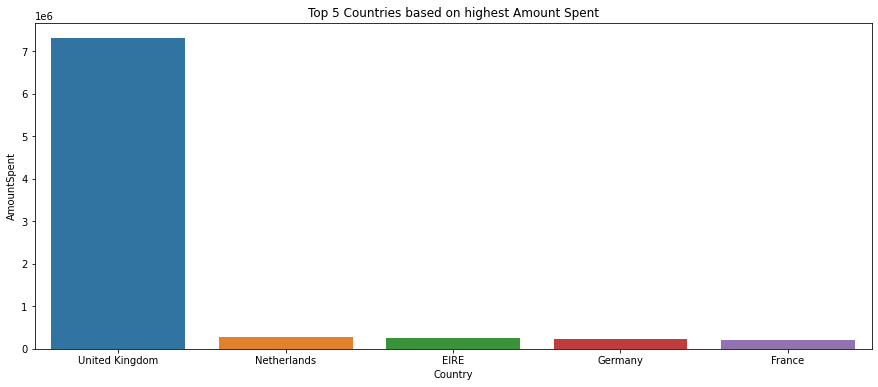

In [20]:
# top 5 countries where maximum sale happens.
plt.figure(figsize=(15,6))
sns.barplot(x=TopCountries['Country'].head(5),y=TopCountries['AmountSpent'].head(5))
plt.title('Top 5 Countries based on highest Amount Spent')

Text(0.5, 1.0, 'Top 5 Countries based on last store revenue contributors ')

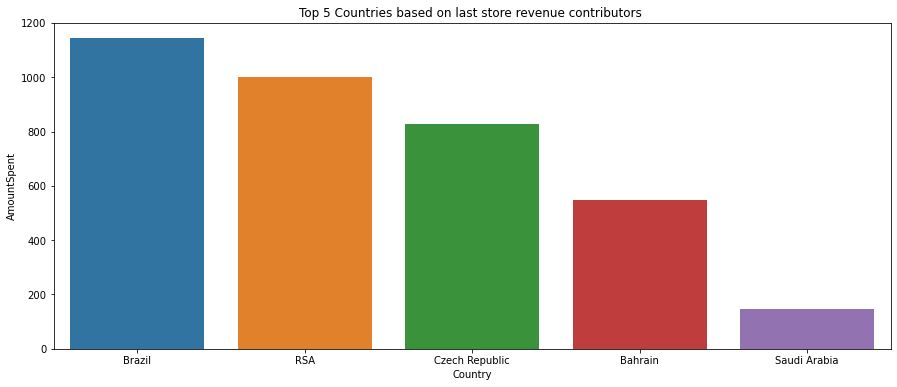

In [21]:
# top 5 countries where least sell happens.
plt.figure(figsize=(15,6))
sns.barplot(x=TopCountries['Country'].tail(5),y=TopCountries['AmountSpent'].tail(5))
plt.title('Top 5 Countries based on last store revenue contributors ')

In [22]:
# sales by month
SalesbyMonth=df.groupby('month')['AmountSpent'].sum().reset_index().sort_values('AmountSpent',ascending=False)
SalesbyMonth

,month,AmountSpent
9,November,1161817.380
2,December,1090906.680
10,October,1039318.790
11,September,952838.382
8,May,678594.560
6,June,661213.690
1,August,645343.900
5,July,600091.011
7,March,595500.760
4,January,569445.040


Text(0.5, 1.0, 'Sales in different Months ')

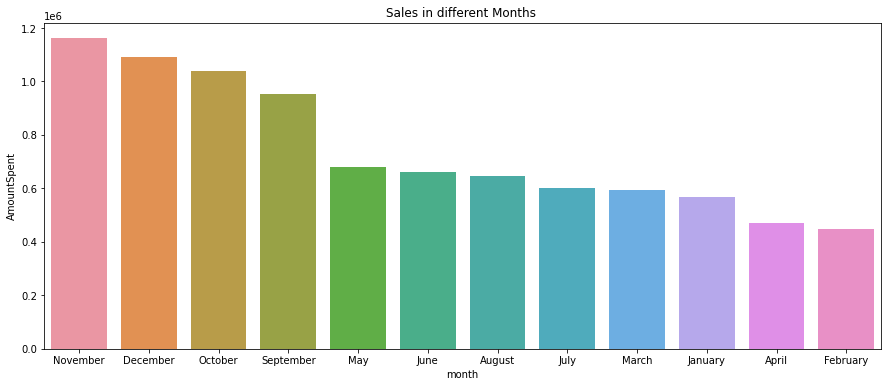

In [23]:
# Sales different months.
plt.figure(figsize=(15,6))
sns.barplot(x=SalesbyMonth['month'],y=SalesbyMonth['AmountSpent'])
plt.title('Sales in different Months ')

In [24]:
# sales on day 
sales_on_day_basis=df.groupby('day')['AmountSpent'].sum().reset_index().sort_values('AmountSpent',ascending=False)
sales_on_day_basis

,day,AmountSpent
3,Thursday,1976859.070
4,Tuesday,1700634.631
5,Wednesday,1588336.170
0,Friday,1485917.401
1,Monday,1367146.411
2,Sunday,792514.221


Text(0.5, 1.0, 'Sales on different Days ')

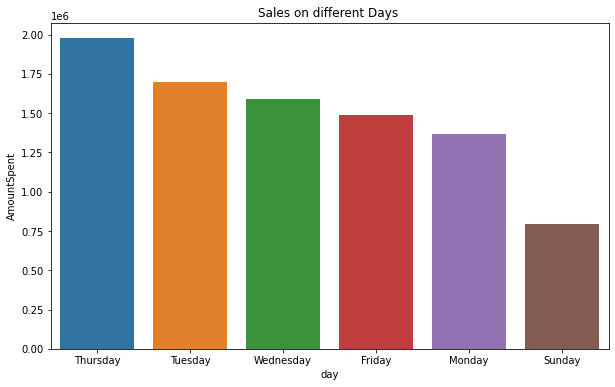

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x=sales_on_day_basis['day'],y=sales_on_day_basis['AmountSpent'])
plt.title('Sales on different Days ')

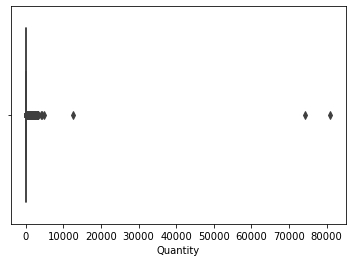

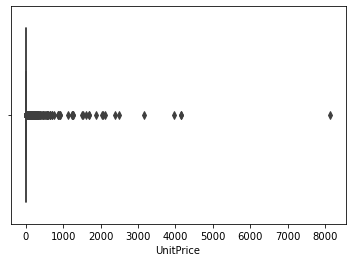

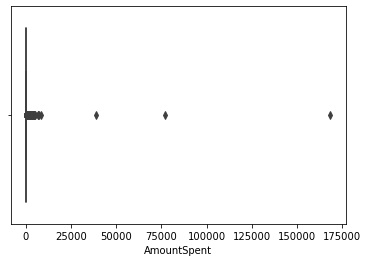

In [26]:
# outliers
for i in df[['Quantity','UnitPrice','AmountSpent']] :
    sns.boxplot(df[i])
    plt.show()

In [27]:
cols = ['AmountSpent'] 

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

<AxesSubplot:xlabel='AmountSpent'>

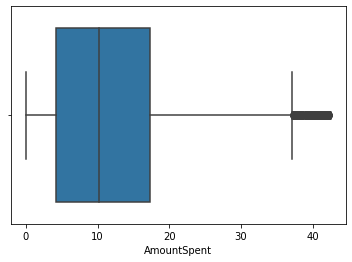

In [28]:
sns.boxplot(df['AmountSpent'])

<AxesSubplot:xlabel='AmountSpent', ylabel='Density'>

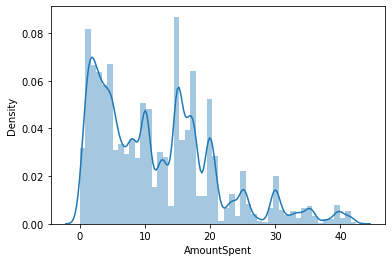

In [29]:
sns.distplot(df['AmountSpent'])

In [30]:
from sklearn.preprocessing import StandardScaler
col_names = ['CustomerID','Quantity','UnitPrice']
features = df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,CustomerID,Quantity,UnitPrice
0,1.480393,-0.080345,-0.068362
1,1.480393,-0.080345,0.224636
2,1.480393,0.006193,0.001400
3,1.480393,-0.080345,0.224636
4,1.480393,-0.080345,0.224636


In [31]:
# Machine learning


In [32]:
# convert amount spent to int
df['AmountSpent']=df['AmountSpent'].astype('int64')
df['UnitPrice']=df['UnitPrice'].astype(int)
df['CustomerID']=df['CustomerID'].astype('int64')

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [34]:
df['itm_description']=le.fit_transform(df['Description'])
df['Country']=le.fit_transform(df['Country'])

In [35]:
df=df.drop(columns=['StockCode','Description','InvDay','InvTime','month','day'])


In [36]:
df.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,itm_description
0,536365,6,2010-12-01 08:26:00,2,17850,35,15,3666
1,536365,6,2010-12-01 08:26:00,3,17850,35,20,3674
2,536365,8,2010-12-01 08:26:00,2,17850,35,22,849
3,536365,6,2010-12-01 08:26:00,3,17850,35,20,1792
4,536365,6,2010-12-01 08:26:00,3,17850,35,20,2741


In [37]:
df.drop_duplicates(inplace=True)

In [38]:
df.shape

(361471, 8)

In [39]:
X = df[['CustomerID','AmountSpent']].values

In [40]:
X

array([[17850,    15],
       [17850,    20],
       [17850,    22],
       ...,
       [12680,    16],
       [12680,    16],
       [12680,    14]], dtype=int64)

In [41]:
from sklearn.cluster import KMeans

In [42]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
print(wcss)


[1056094549035.9456, 267892799728.5738, 117385450851.28531, 63086005805.92973, 40232387068.49605, 27167706568.13997, 21087338299.3576, 15610787422.421764, 12562521609.04785, 9897990046.93588]


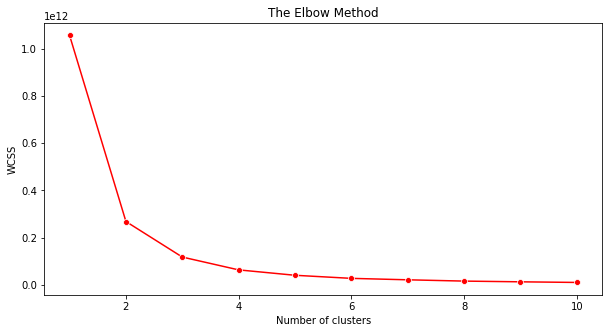

In [43]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(range(1,11), wcss, marker='o', color='red')

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

In [44]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=10)
y_means = kmeans.fit_predict(X)

In [45]:
y_means

array([3, 3, 3, ..., 0, 0, 0])

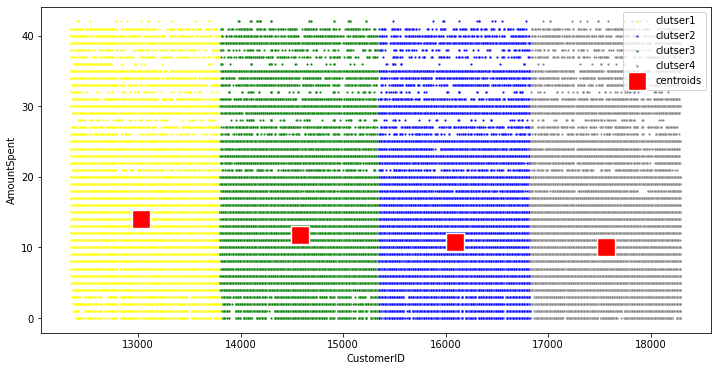

In [46]:
#visualisuing the clusters
plt.figure(figsize=(12,6))

sns.scatterplot(data = X, x = X[y_means==0,0],y = X[y_means==0,1], color='yellow', label='clutser1',s=5)
sns.scatterplot(data = X, x = X[y_means==1,0],y = X[y_means==1,1], color='blue', label='clutser2',s=5)
sns.scatterplot(data = X, x = X[y_means==2,0],y = X[y_means==2,1], color='green', label='clutser3',s=5)
sns.scatterplot(data = X, x = X[y_means==3,0],y = X[y_means==3,1], color='grey', label='clutser4',s=5)
# sns.scatterplot(data = X, x = X[y_means==4,0],y = X[y_means==4,1], color='orange', label='clutser5',s=50)

sns.scatterplot(data=X,x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], color='red',label='centroids', s=300, marker=',')
plt.xlabel('CustomerID')
plt.ylabel('AmountSpent')
plt.show()

In [47]:
from sklearn.metrics import silhouette_score 
silhouette_score(X, kmeans.labels_ , metric='euclidean')

0.5887866618401485

In [48]:
from scipy.cluster import hierarchy

In [49]:
# plt.figure(figsize=(18,8))

# dendrogram = hierarchy.dendrogram(hierarchy.linkage(X,'average'))
# plt.title('Dendrogram')
# plt.xlabel('Customers')
# plt.ylabel('Euclidean Distance')
# plt.axhline(50,color='red')
# plt.show()

In [50]:
tuned_clustering = KMeans(n_clusters=4, init='k-means++', random_state=10)

label = tuned_clustering.fit_predict(X)

In [51]:
label

array([3, 3, 3, ..., 0, 0, 0])

In [ ]:
silhouette_score(X, tuned_clustering.labels_, metric='euclidean')

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
clustering_model = AgglomerativeClustering(n_clusters=4,affinity='euclidean')

In [ ]:
clustering_model.fit(X)

In [ ]:
clustering_prediction = clustering_model.fit_predict(X)
clustering_prediction

In [ ]:
silhouette_score(X, clustering_prediction, metric='euclidean')

In [ ]:
plt.figure(figsize=(16,10))
plt.scatter(X[clustering_prediction==0,0],
            X[clustering_prediction==0,1], s=30, c='green',
           label='cluster1')


plt.scatter(X[clustering_prediction==1,0],
            X[clustering_prediction==1,1], s=30, 
            c='red',label='cluster2')

plt.scatter(X[clustering_prediction==2,0], 
            X[clustering_prediction==2,1], s=30, 
            c='blue',label='cluster3')

plt.scatter(X[clustering_prediction==3,0], 
            X[clustering_prediction==3,1], s=30, 
            c='orange',label='cluster4')


plt.xlabel('CustomerID')
plt.ylabel('itm_description')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
clustering_model = DBSCAN(eps=9, min_samples=4)

In [ ]:
clustering_model.fit(X)

In [ ]:
predict_labels = clustering_model.labels_ 
predict_labels

In [ ]:
plt.scatter(X[:,0], X[:,1], c=predict_labels)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('DBSCAN')

plt.show()